In [40]:
# Importo las librerias a usar 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


Jupiter Notebook que va a trabajar con un dataset del futbol argentino, entre los años 2015/2022. 
Este archivo trabaja con tres grafico usando Matplotlib.


In [14]:
# leo el dataFrame, y le indico entre otros, que tome la columna 0 como indice, y le puse la direccion relativa
# para poder ejecutarlo desde otra pc si se requiere
df=pd.read_csv("./afa_2015_2022_spa.csv", index_col=0,header=0,sep=",")
#df


,fecha,partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local,tiros_arco_local,intentos_local,faltas_local,...,proporcion_zurdos_local,valor_mercado_visitante,altura_media_visitante,edad_media_visitante,proporcion_zurdos_visitante,resultado,fecha_encuentro,apuesta_local,apuesta_visitante,apuesta_empate
torneo,,,,,,,,,,,,,,,,,,,,,
Campeonato 2015,1,1,Velez,Aldosivi,2,0,NaN,NaN,NaN,NaN,...,0.301887,8.725,1.790370,28.100000,0.233333,L,2015-02-13 18:00:00,1.75,5.01,3.37
Campeonato 2015,1,2,Racing Club,Rosario Central,0,1,NaN,NaN,NaN,NaN,...,0.297297,18.350,1.789333,25.608696,0.217391,V,2015-02-13 21:10:00,1.80,4.82,3.23
Campeonato 2015,1,3,San Lorenzo,Colon,2,0,NaN,NaN,NaN,NaN,...,0.285714,12.125,1.801026,24.948718,0.282051,L,2015-02-14 17:00:00,1.70,5.55,3.34
Campeonato 2015,1,4,Gimnasia (LP),Def y Justicia,0,1,NaN,NaN,NaN,NaN,...,0.227273,12.050,1.776889,25.460000,0.240000,V,2015-02-14 17:00:00,2.06,3.82,3.09
Campeonato 2015,1,5,Godoy Cruz,San Martin (SJ),1,1,NaN,NaN,NaN,NaN,...,0.226415,11.250,1.780000,26.153846,0.205128,E,2015-02-14 19:15:00,2.03,3.82,3.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Campeonato 2022,27,10,Patronato,Huracan,3,2,48.0,2.0,10.0,18.0,...,0.250000,24.750,1.781860,24.866667,0.244444,L,2022-10-23 17:00:00,6.13,1.57,3.98
Campeonato 2022,27,11,Barracas Central,Newells,1,1,55.0,4.0,10.0,11.0,...,0.230769,32.275,1.801316,22.923077,0.205128,E,2022-10-24 15:30:00,2.72,2.78,3.07
Campeonato 2022,27,12,Rosario Central,Colon,1,1,62.0,4.0,15.0,8.0,...,0.240741,43.575,1.804737,25.520833,0.163265,E,2022-10-24 16:30:00,2.21,3.26,3.41


In [44]:
df1 = df.groupby('torneo')[['goles_local', 'goles_visitante']].sum()

df1

,goles_local,goles_visitante
torneo,,
Campeonato 2015,567,427
Campeonato 2016/17,562,462
Campeonato 2017/18,489,365
Campeonato 2018/19,406,313
Campeonato 2021,462,334
Campeonato 2022,466,356
Superliga 2019/20,342,289
Transicion 2016,352,249


GRAFICO BAR( BARRAS)


El gráfico de barras muestra de forma separada la cantidad de goles anotados por los equipos locales y visitantes en cada campeonato. Los goles locales se representan en barras azules, mientras que los goles visitantes se representan en barras naranjas. Esta visualización permite comparar y analizar la diferencia de rendimiento entre los equipos en función de su condición de local o visitante en cada torneo.
 

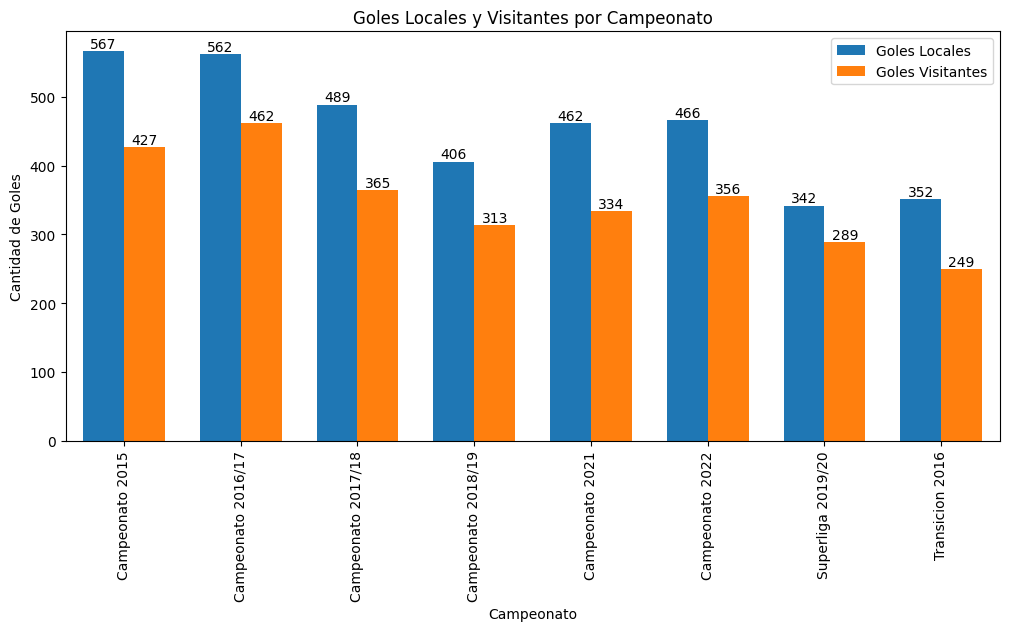

In [47]:
import matplotlib.pyplot as plt

df_goles_por_campeonato = df.groupby('torneo')[['goles_local', 'goles_visitante']].sum()

campeonatos = df_goles_por_campeonato.index.tolist()
goles_locales = df_goles_por_campeonato['goles_local'].tolist()
goles_visitantes = df_goles_por_campeonato['goles_visitante'].tolist()

# Ajusto el tamaño de la figura
fig, ax = plt.subplots(figsize=(10, 6))

# Configuro el gráfico de barras
x = np.arange(len(campeonatos)) 

# Ancho de las barras
width = 0.35 
# Customizo y configuro para que las barras me queden prolijas, o justificadas
ax.bar(x - width/2, goles_locales, width=width, label='Goles Locales')
ax.bar(x + width/2, goles_visitantes, width=width, label='Goles Visitantes')

# Ajustar las etiquetas del eje x y rotación 90° para que no se superpongan
plt.xticks(x, campeonatos, rotation=90)

# Ajustar los límites del gráfico
ax.set_xlim(-0.5, len(campeonatos)-0.5)
plt.tight_layout()

# Etiquetas 
ax.set_xlabel('Campeonatos')
ax.set_ylabel('Cantidad de Goles')
ax.set_title('Goles Locales y Visitantes por Campeonato')

# Agrego la cantidad de goles en las barras para tener noción de la cantidad, usando un bucle for
# Recorre campeonato, para saber la cantidad de goles, como está en entero, lo transformo a String
for i in range(len(campeonatos)):
    ax.text(x[i] - width/2, goles_locales[i], str(goles_locales[i]), ha='center', va='bottom')
    ax.text(x[i] + width/2, goles_visitantes[i], str(goles_visitantes[i]), ha='center', va='bottom')

# Leyenda
ax.legend()

# Muestro el gráfico
plt.show()



 GRAFICO PLOT, O GRAFICO DE LINEAS


El gráfico muestra la evolución de las edades promedio de los equipos locales y visitantes a lo largo de diferentes torneos. Cada línea representa la media de las edades de los jugadores en cada categoría: equipo local y equipo visitante. Los puntos marcados en el gráfico indican los valores de las medias en cada torneo específico.

En el eje y se representa la edad promedio de los jugadores. Las líneas azules representan las edades promedio de los equipos locales, mientras que las líneas verdes muestran las edades promedio de los equipos visitantes.

 

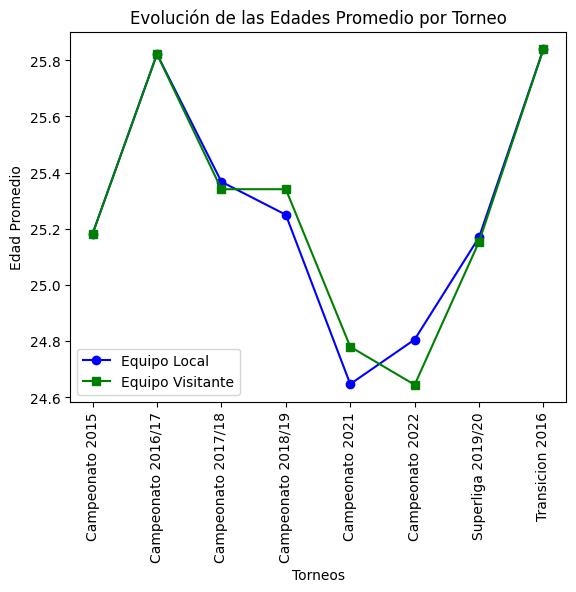

In [9]:
# Creo un DF , con los promedios de edades agrupada por torneo, y saco la media
df_edades =  df.groupby('torneo')[['edad_media_local','edad_media_visitante' ]].median()

# creo las variables torneo (index), edad_media_local y edad_media_visitante
torneos = df_edades.index
edad_media_local = df_edades['edad_media_local']
edad_media_visitante = df_edades['edad_media_visitante']

# Creo el gráfico de línea con marcadores y colores personalizados
# Le paso las variables previamente creadas
plt.plot(torneos, edad_media_local, label='Equipo Local', marker='o', color='blue')
plt.plot(torneos, edad_media_visitante, label='Equipo Visitante', marker='s', color='green')

# le pongo rotacion para que no se superpongan
plt.xticks(rotation=90)

# Etiquetas y título
plt.xlabel('Torneos')
plt.ylabel('Edad Promedio')
plt.title('Evolución de las Edades Promedio por Torneo')


#Le doy limites para que me tome todos los valores
ax.set_xlim(torneos[0], torneos[-1])

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()



GRAFICO PIE CHART, O GRAFICO DE TORTA


Este grafico de pastel que visualiza la proporción de victorias, empates y derrotas en los partidos.
 Proporciona una representación visual intuitiva de la distribución de resultados y facilita la comprensión de la frecuencia de cada tipo de resultado en el conjunto de datos.

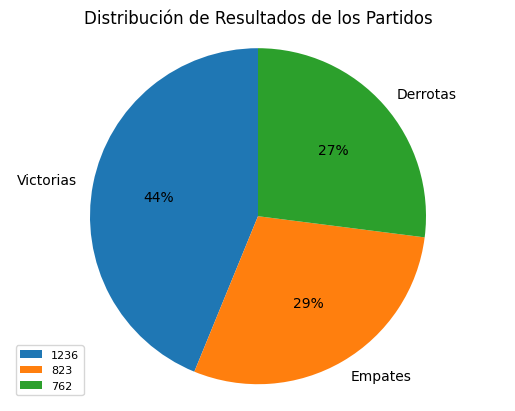

In [11]:
#"Gráfico de Pastel" o "Pie Chart"

# Obtener la cantidad de partidos ganados, empatados y perdidos

# Creo un DF PARA SABER COMO FUE LA DISTRIBUCION DE LOS RESULTADO POSIBLES
# df_dr=df[['equipo_local','equipo_visitante','resultado']]
df_dr=df[['resultado']]

# ASIGNO VARIABLES, Y LAS CUENTO
victorias = df['resultado'].value_counts()['L']  
empates = df['resultado'].value_counts()['E'] 
derrotas = df['resultado'].value_counts()['V'] 

# Crear una lista con los resultados y sus respectivas cantidades
resultados = [victorias, empates, derrotas]
etiquetas = ['Victorias', 'Empates', 'Derrotas']
# clases=['clase alta',]
# Configurar el gráfico de pastel
plt.pie(resultados, labels=etiquetas, autopct='%1.0f%%', startangle=90)
plt.legend(loc="lower left",labels=resultados,fontsize=8)
plt.axis('equal')

# Agregar título
plt.title('Distribución de Resultados de los Partidos')



# Mostrar el gráfico 
plt.show()

